In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

mnist_data=pd.read_csv("mnist_train.csv")
mnist_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X = mnist_data.drop("label", axis=1) #Pixels
y = mnist_data["label"] #Label

Scale the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., nan, nan, nan]])

**a) Expectation-Maximization model**

In [ ]:
# Initialize the Gaussian Mixture Model
n_components = 10  # Number of clusters
em_model = GaussianMixture(n_components=n_components)

**b) Implementation**

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)
X_no_na = X_imputed_df.dropna()

In [ ]:
em_model.fit(X_no_na)

GaussianMixture(n_components=10)

In [ ]:
probability = em_model.predict_proba(X_no_na)

In [ ]:
y_pred=em_model.predict(X_no_na)

In [ ]:
probability

array([[0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        1.59249013e-127, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 1.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       ...,
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000, ...,
        0.00000000e+000, 0.00000000e+000, 1.00000000e+000]])

In [ ]:
y_pred

array([6, 8, 3, ..., 3, 6, 9])

**c) assigning each point to a cluster**

In [ ]:
cluster_assignments =np.argmax(probability,axis=1)

In [ ]:
cluster_to_digit = {}
for cluster in range(n_components):
    cluster_samples = y[cluster_assignments == cluster]
    most_common_digit = cluster_samples.mode()[0]
    cluster_to_digit[cluster] = most_common_digit


In [ ]:
mapped_cluster_assignments = [cluster_to_digit[cluster] for cluster in cluster_assignments]

In [ ]:
# Calculate precision, recall, and accuracy
precision = precision_score(y, mapped_cluster_assignments, average='macro', zero_division=0)
recall = recall_score(y, mapped_cluster_assignments, average='macro', zero_division=0)
accuracy = accuracy_score(y, mapped_cluster_assignments)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")


Precision: 0.5527560983498545
Recall: 0.558600347244741
Accuracy: 0.5693994517817095


**d) Visualize the cluster representative value**

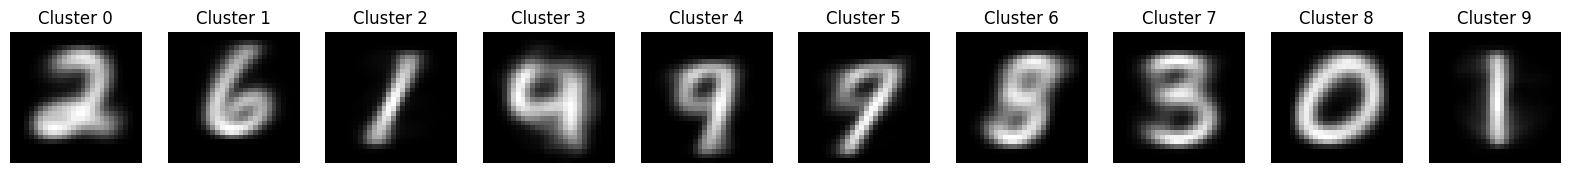

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract mean vectors for each cluster
mean_vectors = em_model.means_

# Plot cluster representative images
plt.figure(figsize=(20, 4))
for i in range(n_components):
    plt.subplot(1, n_components, i + 1)
    # Reshape mean vector into a 28x28 image
    cluster_image = np.reshape(mean_vectors[i], (28, 28))
    plt.imshow(cluster_image, cmap='gray')
    plt.title(f'Cluster {i}')
    plt.axis('off')

plt.show()

**e) Implement a k-means clustering**

In [ ]:
from sklearn.cluster import KMeans

# Initialize KMeans with k=10
kmeans_model = KMeans(n_clusters=10, random_state=42)

# Fit the model
kmeans_model.fit(X_no_na)

# Predict cluster labels
cluster_assignments = kmeans_model.labels_

# Calculate precision, recall, and accuracy
precision1 = precision_score(y, cluster_assignments, average='macro', zero_division=0)
recall1 = recall_score(y, cluster_assignments, average='macro', zero_division=0)
accuracy1 = accuracy_score(y, cluster_assignments)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Precision: 0.5527560983498545
Recall: 0.558600347244741
Accuracy: 0.5693994517817095


**e) Vary the k parameter in the k-means model**

In [ ]:

# list of k values to try
k_values = [2, 5, 15]

precisions = []
recalls = []
accuracies = []

# Iterate over each k value
for k in k_values:
    kmeans_model = KMeans(n_clusters=k, random_state=42)
    kmeans_model.fit(X_no_na)

    cluster_assignments = kmeans_model.labels_

    # precision, recall, and accuracy
    precision = precision_score(y, cluster_assignments, average='macro', zero_division=0)
    recall = recall_score(y, cluster_assignments, average='macro', zero_division=0)
    accuracy = accuracy_score(y, cluster_assignments)

    # Append
    precisions.append(precision)
    recalls.append(recall)
    accuracies.append(accuracy)

# Print evaluation metrics for each k value
for i, k in enumerate(k_values):
    print(f"K={k}: Precision={precisions[i]}, Recall={recalls[i]}, Accuracy={accuracies[i]}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K=2: Precision=0.04396146356039608, Recall=0.19680322765726282, Accuracy=0.2097350278262314
K=5: Precision=0.11496557664527618, Recall=0.25755915431823573, Accuracy=0.26746407508929315
K=15: Precision=0.06694591831907165, Recall=0.043707597759121204, Accuracy=0.07184982141373868


**g) plot the images of the cluster for k=10**

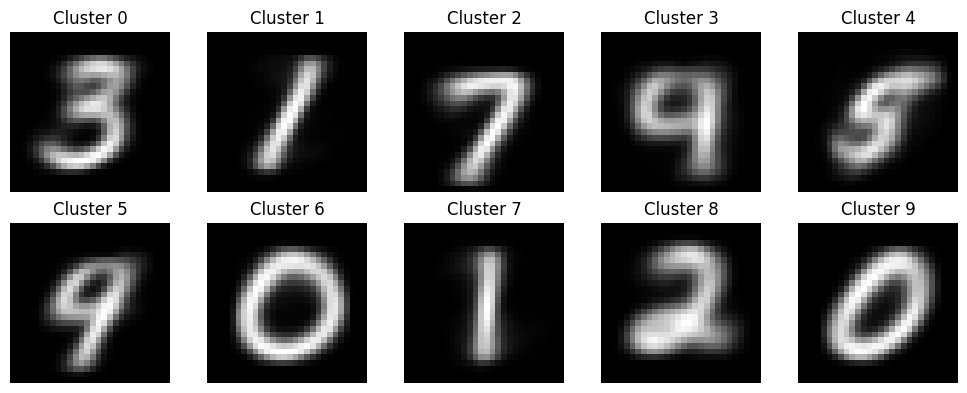

In [ ]:
import matplotlib.pyplot as plt

centroids = kmeans_model.cluster_centers_
centroid_images = centroids.reshape(-1, 28, 28)

# Plot the centroid images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(centroid_images[i], cmap='gray')
    ax.set_title(f'Cluster {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()